<a href="https://colab.research.google.com/github/GeoDahm/GeoDahmApp/blob/aswin/comparson_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#pip install opencv-python

NotImplementedError: A UTF-8 locale is required. Got ANSI_X3.4-1968

In [82]:
pip install segment-geospatial groundingdino-py leafmap localtileserver


NotImplementedError: A UTF-8 locale is required. Got ANSI_X3.4-1968

In [84]:

import os
import leafmap
import samgeo
import torch
from samgeo import SamGeo, raster_to_vector, overlay_images
from samgeo import tms_to_geotiff
from samgeo.text_sam import LangSAM
import cv2



In [85]:
sam_kwargs = {
    "points_per_side": 32,
    "pred_iou_thresh": 0.86,
    "stability_score_thresh": 0.92,
    "crop_n_layers": 1,
    "crop_n_points_downscale_factor": 2,
    "min_mask_region_area": 80,
}

In [86]:
sam = SamGeo(
    model_type="vit_h",
    sam_kwargs=sam_kwargs,
)

In [87]:
input_image1 = "/content/drive/MyDrive/geodam main project/data set/test dataset building change/A/test_80.png"

In [88]:
input_image2 = "/content/drive/MyDrive/geodam main project/data set/test dataset building change/B/test_80.png"

In [105]:
sam.generate(input_image1, output="mask1.tif", foreground=True)

In [111]:
sam.generate(input_image2, output="mask2.tif", foreground=True)

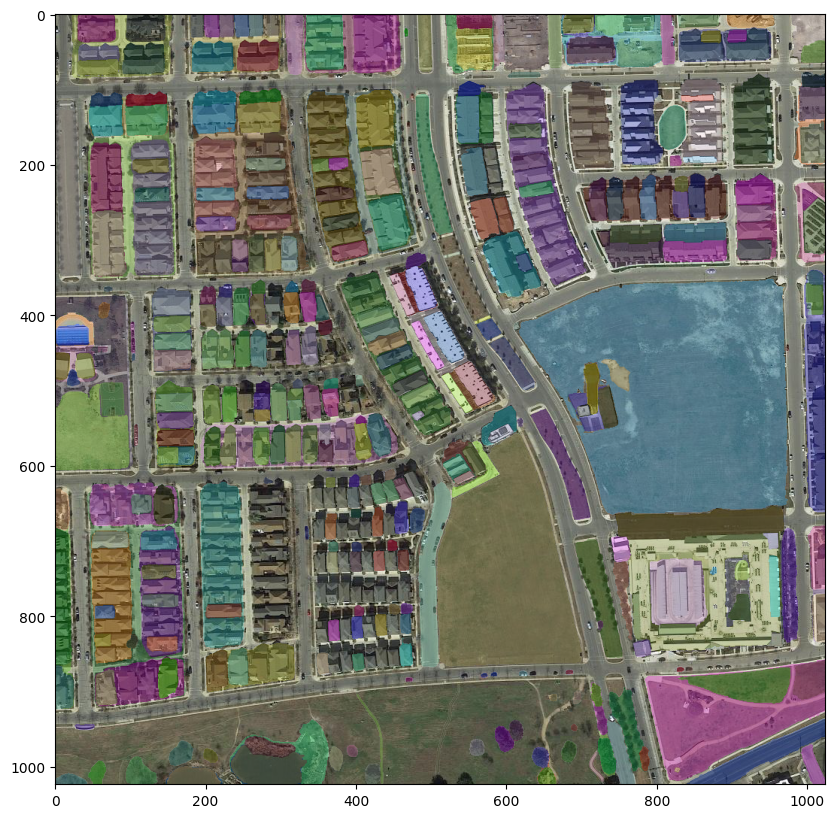

In [113]:
sam.show_anns(axis="on", opacity=10, output="annotation2.tif" ,box_color='red',
    blend=True)

In [102]:
                              # Load the segmentation mask
segmentation_mask = cv2.imread('mask1.tif', cv2.IMREAD_GRAYSCALE)

                              # Find contours in the segmentation mask
contours, _ = cv2.findContours(segmentation_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

                               # Get the number of objects (contours)
num_objects1 = len(contours)
print("Number of objects detected:", num_objects1)

Number of objects detected: 12


In [100]:
                              # Load the segmentation mask
segmentation_mask = cv2.imread('mask2.tif', cv2.IMREAD_GRAYSCALE)

                              # Find contours in the segmentation mask
contours, _ = cv2.findContours(segmentation_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

                               # Get the number of objects (contours)
num_objects2 = len(contours)
print("Number of objects detected:", num_objects2)

Number of objects detected: 56


In [103]:
                        # Find the difference in the number of objects
object_difference = abs(num_objects1 - num_objects2)
print("Difference in the number of objects:", object_difference)

Difference in the number of objects: 44



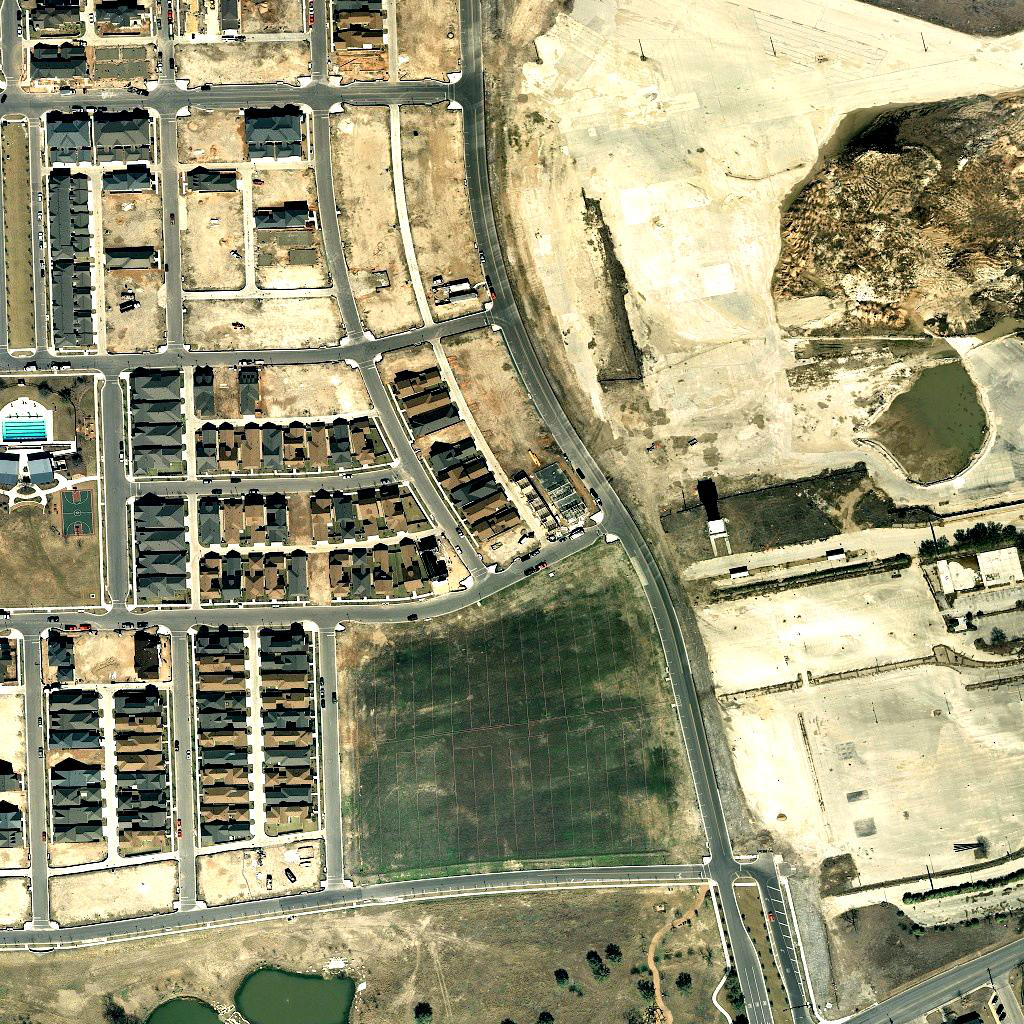
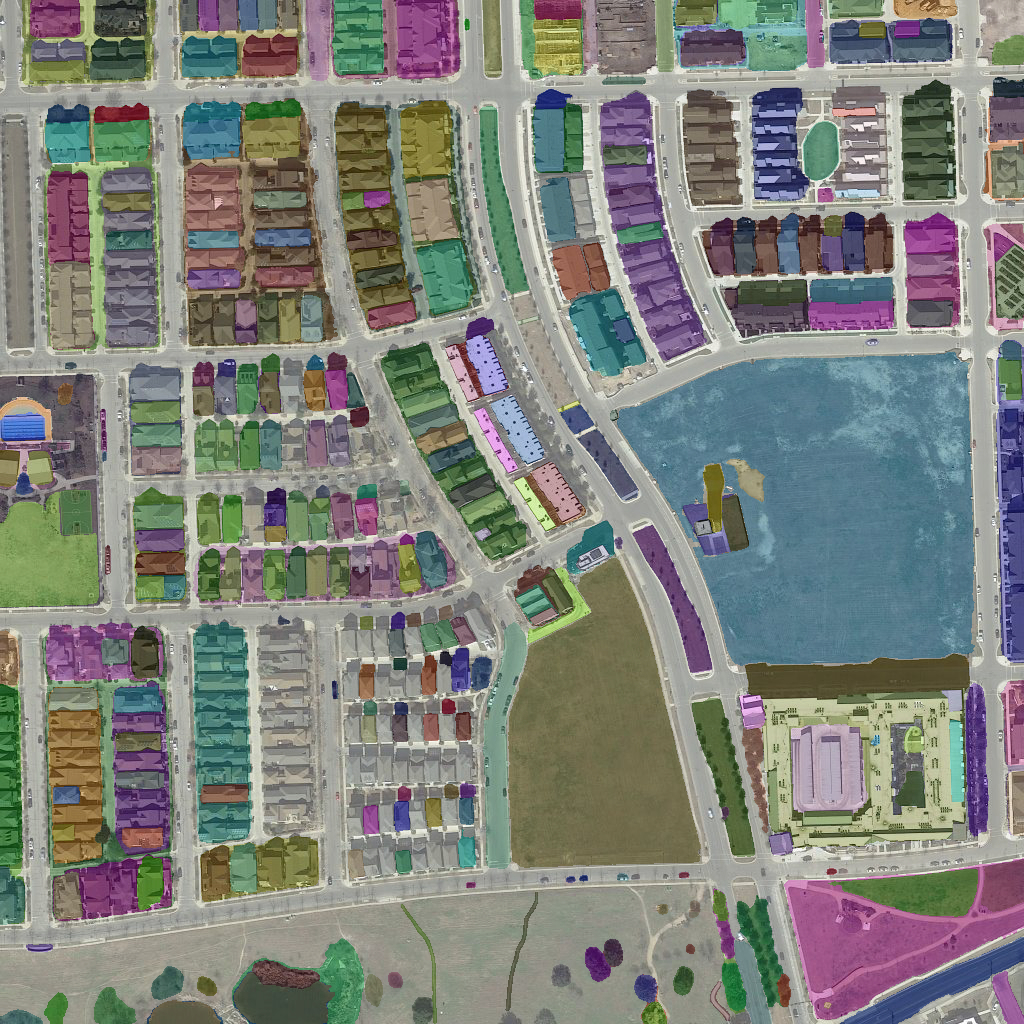

In [114]:
leafmap.image_comparison(
    input_image1,
    "annotation2.tif",
    label1="Image",
    label2="Image Segmentation",
)

.....................................THE END...................................................